# Requirements 📋✅

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# import cv2

# Needed for the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Needed for the CNN
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory


2023-11-30 15:07:06.077418: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 15:07:06.371294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 15:07:06.371363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 15:07:06.422540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 15:07:06.532798: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 15:07:06.534723: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
from tensorflow import convert_to_tensor


# Hopefully fixing cuda

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [5]:
!echo $CUDA_VISIBLE_DEVICES


-1


# The Dataset location 📍

## Label Data Load ⏳

In [62]:
# params
batch_size = 32
img_height = 256
img_width = 256
validation_split = 0.2
num_classes = 4


In [63]:
train_dataset = image_dataset_from_directory(
    directory='/home/kyrill/code/pt-ai/pt-ai/raw_data/processed_data_03',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 4772 files belonging to 4 classes.
Using 3818 files for training.


In [65]:
validation_dataset = image_dataset_from_directory(
    directory='/home/kyrill/code/pt-ai/pt-ai/raw_data/processed_data_03',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 4772 files belonging to 4 classes.
Using 954 files for validation.


In [67]:
type(train_dataset)


tensorflow.python.data.ops.prefetch_op._PrefetchDataset

## Preprocessing ⚙️

### CNN Model Function 🦾💻🧠

In [68]:
def initialize_CNN():
    model = models.Sequential()

    # Preprocessing layers
    model.add(layers.CenterCrop(height=350, width=450, input_shape=[256,256,1]))

    # Build of the Model
    model.add(layers.Conv2D(filters=8, kernel_size=(4,4), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16,(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    # Compilation of the Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [69]:
# Summary of the CNN model
tmp_first_CNN = initialize_CNN()
tmp_first_CNN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 center_crop_1 (CenterCrop)  (None, 350, 450, 1)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 350, 450, 8)       136       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 175, 225, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 173, 223, 16)      1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 86, 111, 16)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 152736)           

In [70]:
es = EarlyStopping(patience=30, restore_best_weights=True)


In [72]:
history = tmp_first_CNN.fit(train_dataset,
                            epochs=100,
                            validation_data=validation_dataset,
                            batch_size=16,
                            callbacks=[es])


Epoch 1/100


120/120 [==============================] - 132s 1s/step - loss: 23.4526 - accuracy: 0.3222 - val_loss: 1.3685 - val_accuracy: 0.3532
Epoch 2/100
120/120 [==============================] - 133s 1s/step - loss: 1.3636 - accuracy: 0.3279 - val_loss: 1.3484 - val_accuracy: 0.3532
Epoch 3/100
120/120 [==============================] - 130s 1s/step - loss: 1.3498 - accuracy: 0.3279 - val_loss: 1.3337 - val_accuracy: 0.3532
Epoch 4/100
120/120 [==============================] - 128s 1s/step - loss: 1.3404 - accuracy: 0.3229 - val_loss: 1.3232 - val_accuracy: 0.3522
Epoch 5/100
120/120 [==============================] - 131s 1s/step - loss: 1.3343 - accuracy: 0.3442 - val_loss: 1.3161 - val_accuracy: 0.3522
Epoch 6/100
120/120 [==============================] - 130s 1s/step - loss: 1.3306 - accuracy: 0.3442 - val_loss: 1.3113 - val_accuracy: 0.3522
Epoch 7/100
120/120 [==============================] - 129s 1s/step - loss: 1.3284 - accuracy: 0.3442 - val_loss: 1.3080 - val_accuracy: 0.3522
Epo

KeyboardInterrupt: 

In [63]:
y_test


,Pose
8,2
1,0


In [64]:
tmp_first_CNN.predict(X_test)


1/1 [==============================] - 0s 187ms/step


array([[0.34540948, 0.60694873, 0.04764181],
       [0.3675208 , 0.44910043, 0.18337871]], dtype=float32)

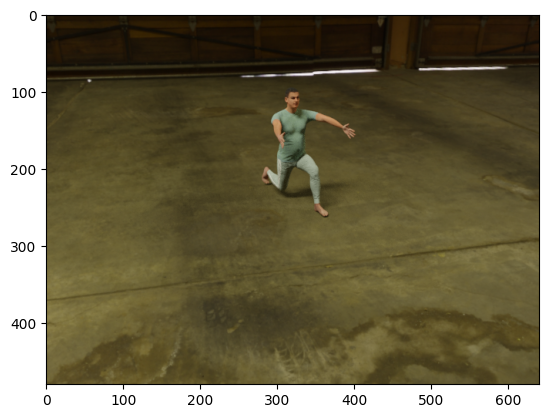

In [65]:
plt.imshow(X_test[1])
